In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
X = myopia_df.drop("MYOPIC", axis=1)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print(X_scaled.shape)

(618, 14)


In [5]:
pca = PCA(n_components=0.9)
principal_components = pca.fit_transform(X_scaled)

print(principal_components.shape)

(618, 10)


In [6]:
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

/Users/tobiadel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tobiadel/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(618, 2)

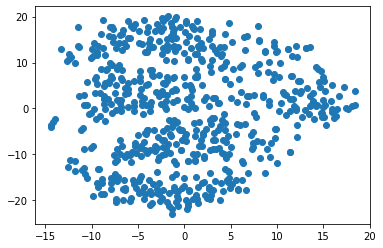

In [7]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [8]:
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_components)
    inertia.append(km.inertia_)
    
    
myopia_data = {"k": k, "inertia": inertia}
df_myopia = pd.DataFrame(myopia_data)
df_myopia.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


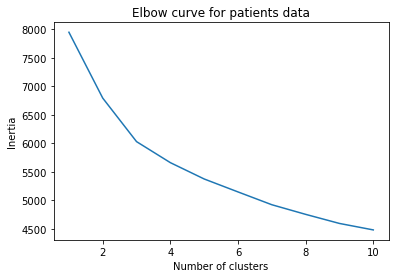

In [9]:
plt.plot(df_myopia['k'], df_myopia['inertia'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patients data')
plt.show()

Using TSNE scatter plot and KMeans elbow plot, it seems that the data may be separated into 2 to 5 clusters 